In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from locale import atof
import locale
locale.setlocale(locale.LC_NUMERIC, '')
%matplotlib inline

In [2]:
df = pd.read_csv("corona.csv", skipfooter=1)

/home/alpha/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.tail()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
145,St. Vincent Grenadines,1,NaN,NaN,NaN,NaN,1,NaN,NaN
146,Suriname,1,NaN,NaN,NaN,NaN,1,NaN,NaN
147,Eswatini,1,+1,NaN,NaN,NaN,1,NaN,0.9
148,Togo,1,NaN,NaN,NaN,NaN,1,NaN,0.1
149,U.S. Virgin Islands,1,+1,NaN,NaN,NaN,1,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
Country,Other       150 non-null object
TotalCases          150 non-null int64
NewCases            91 non-null object
TotalDeaths         46 non-null float64
NewDeaths           23 non-null float64
TotalRecovered      65 non-null float64
ActiveCases         150 non-null int64
Serious,Critical    47 non-null float64
Tot Cases/1M pop    110 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 10.7+ KB


In [5]:
df["NewCases"] = df["NewCases"].apply(lambda x: x is not None and type(x) is str and atof(x.split('+')[1]))

In [6]:
df["NewCases"] = df["NewCases"].replace(False, 0)

In [7]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2
1,Italy,21157,3497.0,1441.0,175.0,1966.0,17750,1518.0,349.9
2,Iran,12729,1365.0,611.0,97.0,4339.0,7779,NaN,151.5
3,S. Korea,8086,107.0,72.0,5.0,714.0,7300,59.0,157.7
4,Spain,6313,1081.0,193.0,60.0,517.0,5603,293.0,135.0


In [8]:
con = df[df["Country,Other"] == "China"]

In [9]:
china = con.drop("Country,Other", axis=1)

In [10]:
china

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2


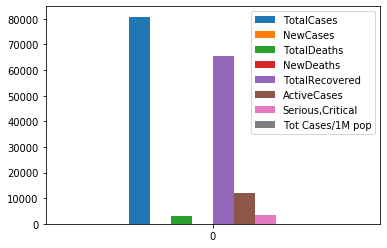

In [11]:
china.plot.bar(rot=0)

matplotlib.axes._subplots.AxesSubplot

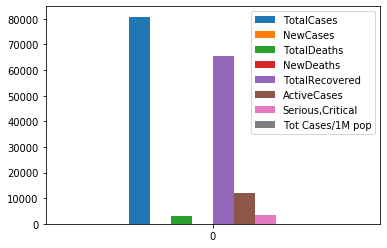

In [12]:
type(china.plot.bar(rot=0))

In [13]:
from matplotlib.figure import Figure

In [14]:
fig = Figure()

In [17]:
ax = fig.add_subplot()

/home/alpha/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


In [18]:
ax.bar(([1, 2, 3, 4], [12, 212, 342, 123]))

TypeError: bar() missing 1 required positional argument: 'height'

In [19]:
ax.plot(([1, 2, 3, 4], [12, 212, 342, 123]))

In [21]:
plt.show()

TypeError: 'AxesSubplot' object is not callable

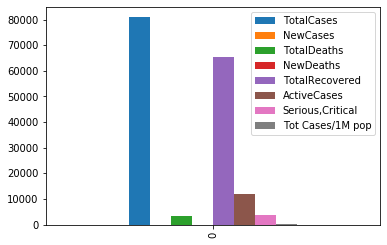

In [22]:
ax(china.plot.bar())

In [36]:
china.iloc[0].values

array([8.0824e+04, 1.1000e+01, 3.1890e+03, 1.3000e+01, 6.5573e+04,
       1.2062e+04, 3.6100e+03, 5.6200e+01])

([<matplotlib.axis.XTick at 0x7f7643bf9810>,
 <a list of 8 Text xticklabel objects>)

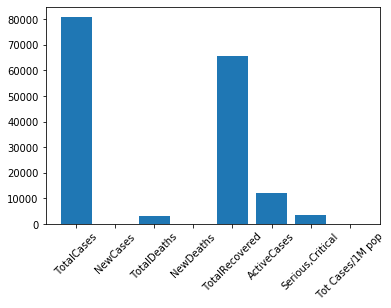

In [43]:
plt.bar(range(8), china.iloc[0].values)
plt.xticks(range(8), china.columns, rotation=45)

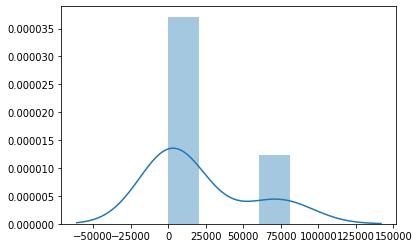